In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
# --- Paths -------------------------------------------------------------
DATA_DIR = Path("/home/mpradhan/Intern_Research_Project/data")
compare_path = DATA_DIR / "y_prob_compare_04.csv"
prob_path = DATA_DIR / "X_master_dense_prob.csv"
label_path = DATA_DIR / "y_master.csv"


In [9]:
# --- Load combined label + probability ---------------------------------
if compare_path.exists():
    df = pd.read_csv(compare_path)
else:
    # Build on the fly if the combined file doesn't exist
    if not (prob_path.exists() and label_path.exists()):
        raise FileNotFoundError(
            "Couldn't locate either y_prob_compare.csv or the raw "
            "X_master_dense_prob.csv and y_master.csv files."
        )

    prob_df = pd.read_csv(prob_path, usecols=["xgb_pos_prob"])
    labels = pd.read_csv(label_path).squeeze("columns")
    df = pd.concat([labels.rename("label"), prob_df["xgb_pos_prob"]], axis=1)

In [10]:
# --- Separate positives and unlabeled ----------------------------------
pos_probs = df.loc[df["label"] == 1, "xgb_pos_prob"]
unl_probs = df.loc[df["label"] == 0, "xgb_pos_prob"]

# --- Summary stats for quick inspection --------------------------------
summary = (
    pd.DataFrame({
        "Positive": pos_probs.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]),
        "Unlabeled": unl_probs.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]),
    })
    .rename_axis("Statistic")
    .reset_index()
)

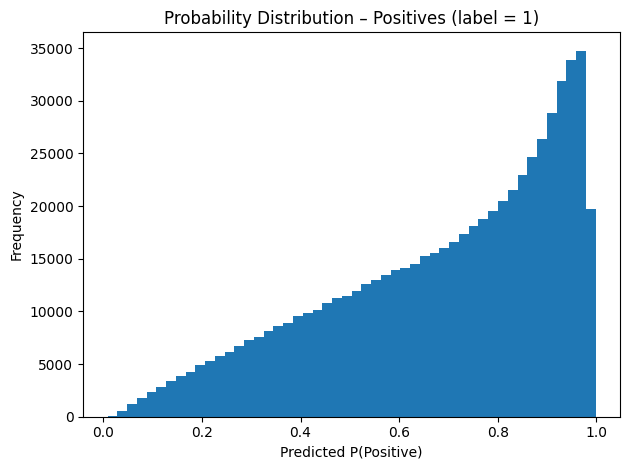

In [11]:
# --- Histogram: Positives ----------------------------------------------
plt.figure()
plt.hist(pos_probs, bins=50)
plt.xlabel("Predicted P(Positive)")
plt.ylabel("Frequency")
plt.title("Probability Distribution – Positives (label = 1)")
plt.tight_layout()
plt.show()

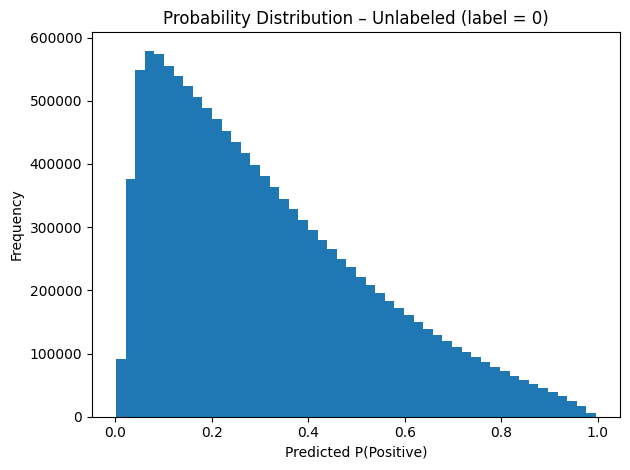

In [12]:
# --- Histogram: Unlabeled ----------------------------------------------
plt.figure()
plt.hist(unl_probs, bins=50)
plt.xlabel("Predicted P(Positive)")
plt.ylabel("Frequency")
plt.title("Probability Distribution – Unlabeled (label = 0)")
plt.tight_layout()
plt.show()